# Chapter 6. AI 기초 - Regression 1
* 교재 : 으뜸 머신러닝(생능출판)
* 출처 : https://www.booksr.co.kr/product/9788970503691/

In [1]:
import numpy as np
import pandas as pd

import matplotlib
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus = False)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 1. Logistic Regression

In [2]:
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
data = pd.read_csv(data_url, header = None)
data.head(3)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [3]:
label = {'Iris-setosa' : 0, 'Iris-versicolor' : 1, 'Iris-virginica' : 2}

X = data.iloc[:,:4].values
X = X[:,[0,2]]
Y = data.iloc[:,4].map(label).values
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

## Scatter Plot

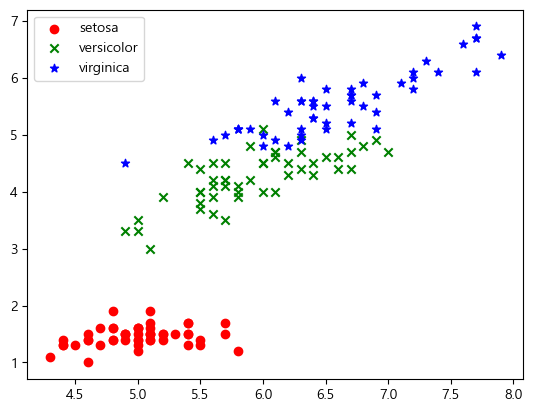

In [4]:
plt.figure()

plt.scatter(X[Y == 0,0], X[Y == 0,1], color = 'r', marker = 'o', label = 'setosa')
plt.scatter(X[Y == 1,0], X[Y == 1,1], color = 'g', marker = 'x', label = 'versicolor')
plt.scatter(X[Y == 2,0], X[Y == 2,1], color = 'b', marker = '*', label = 'virginica')

plt.legend()
plt.show()

## Modeling

In [5]:
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression

In [6]:
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    #print(xx1)
    #print(xx2)
    #print(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[np.ravel([y == cl]), 0],
                    y=X[np.ravel([y == cl]), 1],
                    alpha=0.8,
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)
    plt.xlabel('sepal length(cm)')
    plt.ylabel('petal length(cm)')

    plt.legend()
    plt.show()

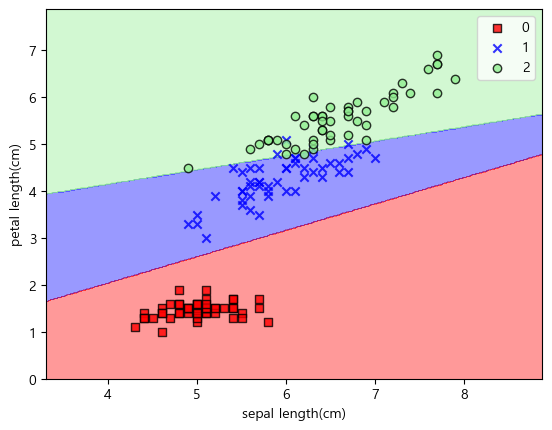

In [7]:
lr_model = LogisticRegression(solver = 'liblinear',
                              # multi_class : auto - 분류해야 할 값이 몇 개인지 자동으로 확인
                              multi_class = 'auto',  
                              # C : 서로 다른 값 사이에 만들어지는 선의 위치
                              C = 100, 
                              random_state = 1)
lr_model.fit(X, Y)

plot_decision_regions(X, Y, lr_model)

# 2. Linear Regression

In [8]:
data_url = 'https://github.com/dknife/ML/raw/main/data/pollution.csv'
data = pd.read_csv(data_url)
data.head(3)

,input,pollution
0,0.240557,4.858750
1,0.159731,4.471091
2,0.108295,4.341897


In [9]:
X = data['input'].values.reshape(-1,1)
Y = data['pollution'].values.reshape(-1,1)

print(X.shape, Y.shape)

(100, 1) (100, 1)


## Scatter Plot

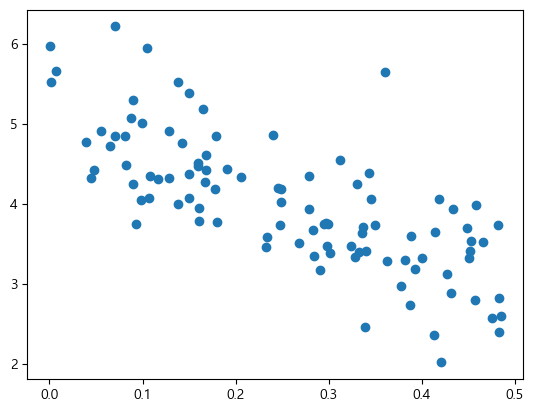

In [10]:
plt.figure()

plt.scatter(X, Y)

## Modeling

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr_model = LinearRegression()
lr_model.fit(X, Y)

LinearRegression()

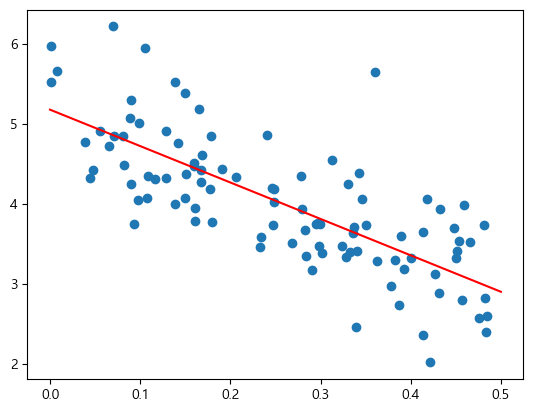

In [13]:
plt.figure()

plt.scatter(X, Y)
plt.plot([0,0.5], lr_model.predict([[0],[0.5]]), color = 'r')

plt.show()

# 3. Regression Metric
* MSE : 일반적으로 가장 많이 활용되는 지표, 학습 혹은 결과 확인 때 활용
* MAE : 단독으로 사용하거나 학습으로 사용하기에는 힘들고, 모니터링할 때 변화하는 수치를 확인할 때 활용
* RMSE : 이상치가 큰 경우 활용되는 지표로 학습 혹은 결과 확인 때 활용
* MSE, MAE, RMSE는 값이 작을수록 성능이 좋다고 판단한다.
* R-Squared : 에러 값이 존재하는 분포를 그려 그 분포 내에 있을 확률을 확인하는 지표로 결과를 확인할 때 활용

## MSE

In [14]:
from sklearn.metrics import mean_squared_error

In [15]:
pred = lr_model.predict(X)
mean_squared_error(Y, pred).round(4)

0.3097

## MAE

In [16]:
from sklearn.metrics import mean_absolute_error

In [17]:
pred = lr_model.predict(X)
mean_absolute_error(Y, pred).round(4)

0.4331

## RMSE

In [18]:
pred = lr_model.predict(X)
# squared = False : RMSE
mean_squared_error(Y, pred, squared = False).round(4)

0.5565

# 4. Polynomial Regression

In [19]:
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
data = pd.read_csv(data_url, header = None)
data.head(3)

label = {'Iris-setosa' : 0, 'Iris-versicolor' : 1, 'Iris-virginica' : 2}

X = data.iloc[:,:4].values
X = X[:,[0,2]]
Y = data.iloc[:,4].map(label).values

## Data Split
* 일반적으로 train 7 : test 3 OR train 8 : test 2
* 데이터의 수가 많은 경우 train 9 : test 1, 데이터의 수가 작은 경우 train 6 : test 4
* 데이터의 수가 작은 경우 test의 수를 낮추면 표본이 작아져 추정이 힘들다.

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

## Scatter Plot

### Train Data

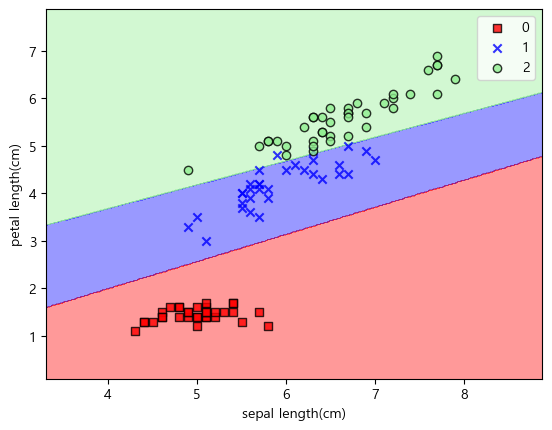

In [22]:
lr_model = LogisticRegression(solver = 'liblinear',
                              # multi_class : auto - 분류해야 할 값이 몇 개인지 자동으로 확인
                              multi_class = 'auto',
                              # C : 서로 다른 값 사이에 만들어지는 선의 위치
                              C = 100,
                              random_state = 1)
lr_model.fit(X_train, Y_train)

plot_decision_regions(X_train, Y_train, lr_model)

### Test Data

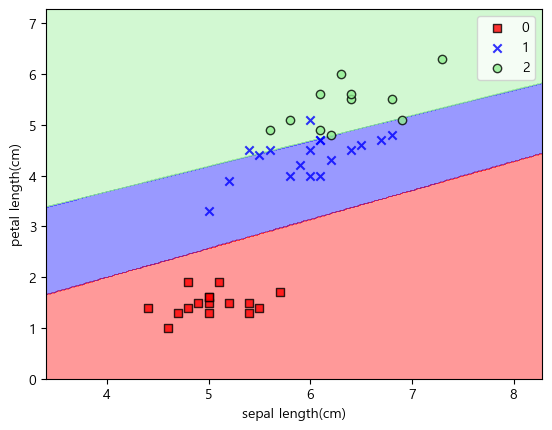

In [23]:
plot_decision_regions(X_test, Y_test, lr_model)

## Accuracy
* 데이터를 몇개 맞췄는지 확인하는 성능 평가 지표

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
pred = lr_model.predict(X_train)
print('Train Accuracy')
print(accuracy_score(Y_train, pred).round(4))
pred = lr_model.predict(X_test)
print('\nTest Accuracy')
print(accuracy_score(Y_test, pred).round(4))

Train Accuracy
0.981

Test Accuracy
0.9111


## Ex)

In [26]:
data_url = 'https://github.com/dknife/ML/raw/main/data/life_expectancy.csv'
data = pd.read_csv(data_url)
data.head(3)

,Country,Year,Status,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9


In [27]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult mortality',
       'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', 'HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [28]:
data = data[['Life expectancy', 'Alcohol', 'Percentage expenditure', 'BMI', 'Polio', 'GDP', 'Thinness 5-9 years', ]]

### Missing Data

In [29]:
data.dropna(inplace = True)
data.isna().sum()

Life expectancy           0
Alcohol                   0
Percentage expenditure    0
BMI                       0
Polio                     0
GDP                       0
Thinness 5-9 years        0
dtype: int64

### Data Split

In [30]:
Y = data['Life expectancy']
X = data.drop('Life expectancy', axis = 1)

### Polynomial Features

In [31]:
from sklearn.preprocessing import PolynomialFeatures

In [32]:
pf = PolynomialFeatures(degree = 3)
X_pf = pf.fit_transform(X)

### Modeling

In [33]:
lr_model = LinearRegression()
lr_model.fit(X_pf, Y)

LinearRegression()

### Scatter Plot

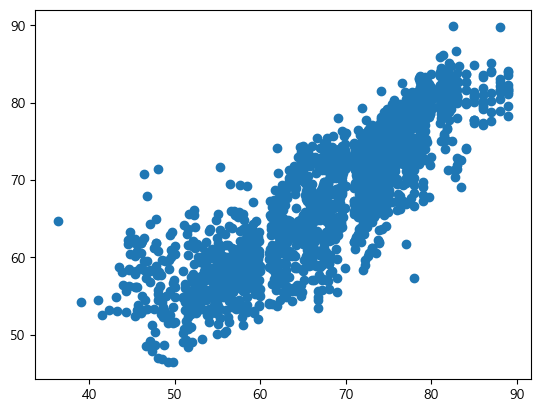

In [34]:
pred = lr_model.predict(X_pf)

plt.figure()

plt.scatter(Y, pred)

# 5. Linear VS Polynomial

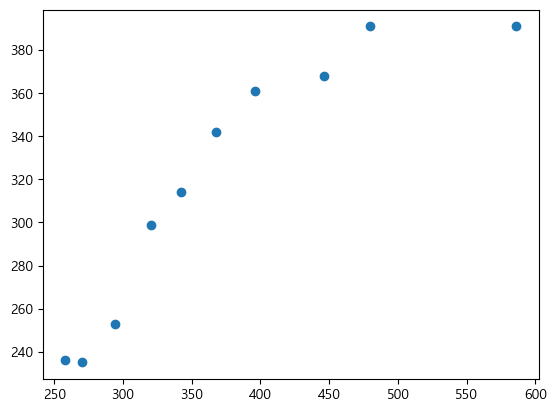

In [35]:
X = np.array([258,270,294,320,342,368,396,446,480,586])
Y = np.array([236,235,253,299,314,342,361,368,391,391])

X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

plt.figure()

plt.scatter(X, Y)

## Linear Regression

In [36]:
lr_model1 = LinearRegression()
lr_model1.fit(X, Y)

LinearRegression()

## Polynomial Regression

In [37]:
lr_model2 = LinearRegression()
pf = PolynomialFeatures(degree = 2)
X_pf = pf.fit_transform(X)
lr_model2.fit(X_pf, Y)

LinearRegression()

## Scatter Plot

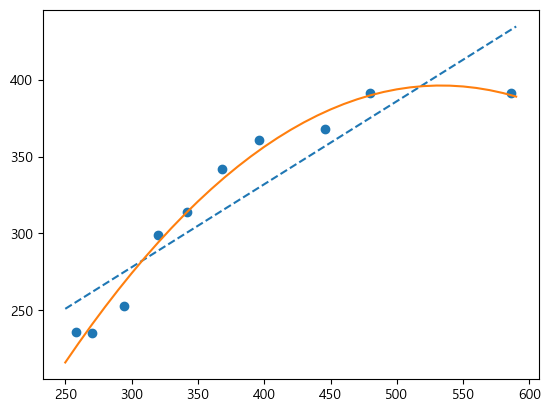

In [38]:
X_range = np.arange(250,600,10).reshape(-1,1)

plt.figure()

plt.scatter(X, Y)
# Linear Regression
plt.plot(X_range, lr_model1.predict(X_range), linestyle = '--')
# Polynomial Regression
plt.plot(X_range, lr_model2.predict(pf.transform(X_range)))